In [6]:
# 単語レベルの one-hot エンコーディング

import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

max_length = 10
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1

In [16]:
# 文字レベルの one-hot エンコーディング

import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50
results = np.zeros((
    len(samples),
    max_length,
    max(token_index.values()) + 1
))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample[:max_length]):
        index = token_index.get(character)
        results[i, j, index] = 1

In [21]:
# Keras を使った単語レベルの one-hot エンコーディング

from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 出現頻度が最も高い 1000 個の単語だけを処理するように設定されたトークナイザの作成
tokenizer = Tokenizer(num_words=1000)
# 単語のインデックスを構築
tokenizer.fit_on_texts(samples)
# 文字列を整数のインデックスリストに変換
sequences = tokenizer.texts_to_sequences(samples)
# 2 値の one-hot エンコーディング表現を取得
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
# 単語のインデックスを取得
word_index = tokenizer.word_index

In [24]:
# ハッシュトリックを用いた単語レベルの one-hot エンコーディング

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimentionality = 1000
max_length = 10

results = np.zeros((
    len(samples),
    max_length,
    dimentionality
))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimentionality
        results[i, j, index] = 1

In [26]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000

max_len = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

In [33]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()

model.add(Embedding(10000, 8, input_length=max_len))

model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_5 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [39]:
import os

imdb_dir = 'aclImdb'

train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
        if label_type == 'neg':
            labels.append(0)
        else:
            labels.append(1)

In [40]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

max_len = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=max_len)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [44]:
glove_dir = 'glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [46]:
embedding_dim = 100

embedding_matrix = np.zeros((
    max_words,
    embedding_dim
))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [49]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(
    max_words,
    embedding_dim,
    input_length=max_len
))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_7 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [54]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
)
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 1.2395 - acc: 0.4900 - val_loss: 0.7918 - val_acc: 0.4995
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7071 - acc: 0.5150 - val_loss: 0.7370 - val_acc: 0.5228
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4674 - acc: 0.7800 - val_loss: 0.7593 - val_acc: 0.5021
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4214 - acc: 0.7800 - val_loss: 0.6883 - val_acc: 0.5571
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3820 - acc: 0.8350 - val_loss: 0.7195 - val_acc: 0.5132
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2556 - acc: 0.9700 - val_loss: 0.7268 - val_acc: 0.5563
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3494 - acc: 0.8700 - val_loss: 0.8193 - val_acc: 0.5136
Epoch 8/10
200/200 [========

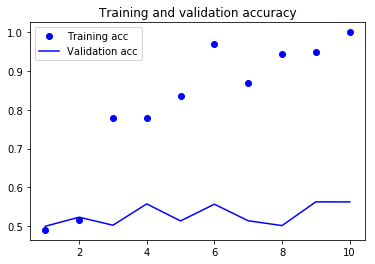

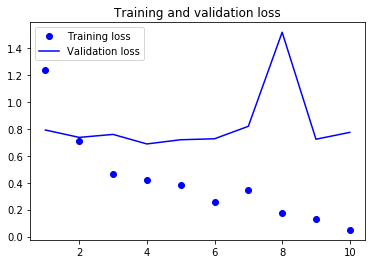

In [61]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [62]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(
    max_words,
    embedding_dim,
    input_length=max_len
))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_8 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 0.6948 - acc: 0.4950 - val_loss: 0.6924 - val_acc: 0.5108
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5195 - a

In [ ]:
import os

imdb_dir = 'aclImdb'

train_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
        if label_type == 'neg':
            labels.append(0)
        else:
            labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=max_len)
y_test = np.asarray(labels)
model.load_weights('pre_t')